ÉTUDE DU MOUVEMENT DE KEPLER

Informations pratiques:
- 1 ua = distance Terre-Soleil
- Selon le SI, on a: 1 ua = 1.5 * 10^11 (m); M_soleil = 2 * 10^30 (kg); G = 6.67 * 10^-11 (m^3 kg^-1 s^-2)

Pistes de réflexion:
- Etude comparative des méthodes d’Euler et de Runge-Kutta
- Implémentation de méthodes alternatives (Euler-Richardson, Verlet)
- Vérification de la troisième loi de Kepler et de la loi des aires (appelée aussi « deuxième loi de Kepler »)

On a  𝑥′′(𝑡)+ 𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2) = 0 (1𝑎)
      𝑦′′(𝑡) + 𝒢𝑀𝑦(𝑡)/[𝑥(𝑡)² + 𝑦(𝑡)²]^(3/2) = 0 (1𝑏)

En posant u = 𝑥′ et v = 𝑦′ on a
    u′(𝑡) = - 𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2) (1𝑎)
    v′(𝑡) = - 𝒢𝑀𝑦(𝑡)/[𝑥(𝑡)² + 𝑦(𝑡)²]^(3/2) (1𝑏)
    𝑥′ = u (1c)
    𝑦′ = v (1d)
    
Donc les suites imbriquées sont:
    u_n+1 ← u_n - h𝒢𝑀𝑥(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2)
    v_n+1 ← v_n - h𝒢𝑀y(𝑡)/[𝑥(𝑡)² +𝑦(𝑡)²]^(3/2)
    x_n+1 ← x_n + hu
    y_n+1 ← y_n + hv

In [3]:
#IMPORTS
import numpy as np
import matplotlib.pyplot as plt

# définition des fonctions k1, l1, k2, l2 et g
def k1(x, y, G, M):
    return (-G*M*x)/np.power((x**2+y**2), 3/2)

def l1(x, y, G, M):
    return (-G*M*y)/np.power((x**2+y**2), 3/2)

def k2(u, v):
    return u

def l2(u, v):
    return v

def fct_Euler_2D(x0, y0, x_prime0, y_prime0, tmin, tmax, pas, K1, K2, L1, L2, G, M):
    """
    Implémente la méthode d'Euler pour le problème de Kepler.

    Arguments :
    - x0, y0 : positions initiales (UA)
    - x_prime0, y_prime0 : vitesses initiales
    - tmin, tmax : intervalle de temps (années)
    - pas : pas de discrétisation temporelle
    - K1 : fonction K1(x, y, G, M) pour l'accélération en x (du/dt)
    - K2 : fonction K2(u, v) pour la vitesse en x (dx/dt)
    - L1 : fonction L1(x, y, G, M) pour l'accélération en y (dv/dt)
    - L2 : fonction L2(u, v) pour la vitesse en y (dy/dt)
    - G, M : constante gravitationnelle et masse de l'étoile

    Retourne :
    - x : tableau des positions en x
    - y : tableau des positions en y
    - t : tableau des instants de temps
    """
    # Création du tableau des instants temporels
    t = np.arange(tmin, tmax+pas, pas)

    # Initialisation des positions
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0
    y[0] = y0

    # Initialisation des vitesses
    u = np.zeros(len(t))
    v = np.zeros(len(t))
    u[0] = x_prime0
    v[0] = y_prime0

    # Boucle d'intégration par la méthode d'Euler
    for k in range(1, len(t)):
        # Mise à jour des vitesses (en utilisant les accélérations)
        u[k] = u[k-1] + pas*K1(x[k-1], y[k-1], G, M)
        v[k] = v[k-1] + pas*L1(x[k-1], y[k-1], G, M)

        # Mise à jour des positions (en utilisant les vitesses)
        x[k] = x[k-1] + pas*K2(u[k-1], v[k-1])
        y[k] = y[k-1] + pas*L2(u[k-1], v[k-1])

    return x, y, t


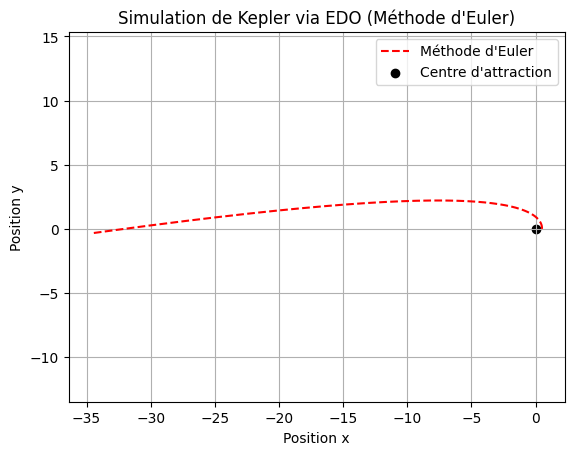

In [ ]:
# paramètres et conditions initiales
from matplotlib import legend


M_soleil = 1
G_temp = 4*(np.pi)**2
t_min = 0.0
t_max = 15
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = 0  # vitesse astre initiale (x)
y_prime0 = 11.5  # vitesse astre initiale (y)
beta_RK = 0.5

u1 = x_prime0 + h*k1(x0,y0, G_temp, M_soleil)
v1 = y_prime0 + h*l1(x0,y0, G_temp, M_soleil)
x1 = x0 + h*k2(x_prime0,y_prime0)
y1 = y0 + h*l2(x_prime0,y_prime0)

# méthode d'Euler
# x0, y0, x_prime0, y_prime0, tmin, tmax, pas, beta, K1, L1, K2, L2
xEuler, yEuler, t = fct_Euler_2D(x0, y0, x_prime0, y_prime0, t_min, t_max, h, k1, k2, l1, l2, G_temp, M_soleil)

# méthode de Runge-Kutta d'ordre 2, conditions initiales différentes
t_min = 0.0
t_max = 15.0
h = 0.01
x0 = 0.5  # position astre initiale (x)
y0 = 0  # position astre initiale (y)
x_prime0 = -2.1  # vitesse astre initiale (x)
y_prime0 = 15.5  # vitesse astre initiale (y)

# Tracer les trajectoires
plt.figure()
plt.plot(xEuler, yEuler, label="Méthode d'Euler", linestyle="--", color="r")
# Ajouter le centre d'attraction (astre central)
plt.scatter(0, 0, color="black", marker="o", label="Centre d'attraction")

# Labels et légende
plt.xlabel("Position x")
plt.ylabel("Position y")
plt.title("Simulation de Kepler via EDO")
plt.legend()
plt.grid()
plt.axis("equal")  # Pour conserver les proportions réelles

plt.show()

# Vérification de la loi des aires
output_aire = verifier_loi_aires(xRK4, yRK4, t)
if output_aire:
    print("La loi des aires de Kepler est respectée.")
    
    print("Liste des erreurs les plus élevées (en %):")
    for i, (temps, erreur) in enumerate(output_aire[:10], 1):
        print(f"{i}. t = {temps:.2f} : Erreur = {erreur:.5f}")
    i = 0
    while i<len(output_aire) and output_aire[i][1]>0.05:
        i+=1
    print("Première erreur en dessous de 5%")
    print(f"{i+1}/{len(output_aire)}. t = {output_aire[i][0]:.2f} : Erreur = {output_aire[i][1]:.5f}")
    print(f"La moyenne est {np.mean(erreur)}")
else:
    print("La loi des aires de Kepler n'est pas respectée.")